# Problem 1

In [1]:
import pandas as pd
logins = pd.read_json('logins.json', orient='columns')

# print out the type of the login_time
print(type(logins['login_time'][1]))
logins.head()

<class 'pandas._libs.tslib.Timestamp'>


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [2]:
# Aggregate the login frequency by every fifteen minutes
login_freq = logins.resample('15Min', on='login_time').count()
login_freq.columns = ['login_nums']
login_freq.head()

,login_nums
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [3]:
# Create a new data frame same as login_freq: df
df = login_freq.copy()
# Seperate the single timestamp index into multi-index: 'date' and 'time'
df.index = pd.MultiIndex.from_arrays([df.index.date, df.index.time], names=['date', 'time'])
# Aggregate all the logins into a 24 hour time frame, so that the daily login pattern can be clearly seen
df1 = df.groupby('time')['login_nums'].sum()
df1.index

Index([00:00:00, 00:15:00, 00:30:00, 00:45:00, 01:00:00, 01:15:00, 01:30:00,
       01:45:00, 02:00:00, 02:15:00, 02:30:00, 02:45:00, 03:00:00, 03:15:00,
       03:30:00, 03:45:00, 04:00:00, 04:15:00, 04:30:00, 04:45:00, 05:00:00,
       05:15:00, 05:30:00, 05:45:00, 06:00:00, 06:15:00, 06:30:00, 06:45:00,
       07:00:00, 07:15:00, 07:30:00, 07:45:00, 08:00:00, 08:15:00, 08:30:00,
       08:45:00, 09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00:00, 10:15:00,
       10:30:00, 10:45:00, 11:00:00, 11:15:00, 11:30:00, 11:45:00, 12:00:00,
       12:15:00, 12:30:00, 12:45:00, 13:00:00, 13:15:00, 13:30:00, 13:45:00,
       14:00:00, 14:15:00, 14:30:00, 14:45:00, 15:00:00, 15:15:00, 15:30:00,
       15:45:00, 16:00:00, 16:15:00, 16:30:00, 16:45:00, 17:00:00, 17:15:00,
       17:30:00, 17:45:00, 18:00:00, 18:15:00, 18:30:00, 18:45:00, 19:00:00,
       19:15:00, 19:30:00, 19:45:00, 20:00:00, 20:15:00, 20:30:00, 20:45:00,
       21:00:00, 21:15:00, 21:30:00, 21:45:00, 22:00:00, 22:15:00, 22:30:00,

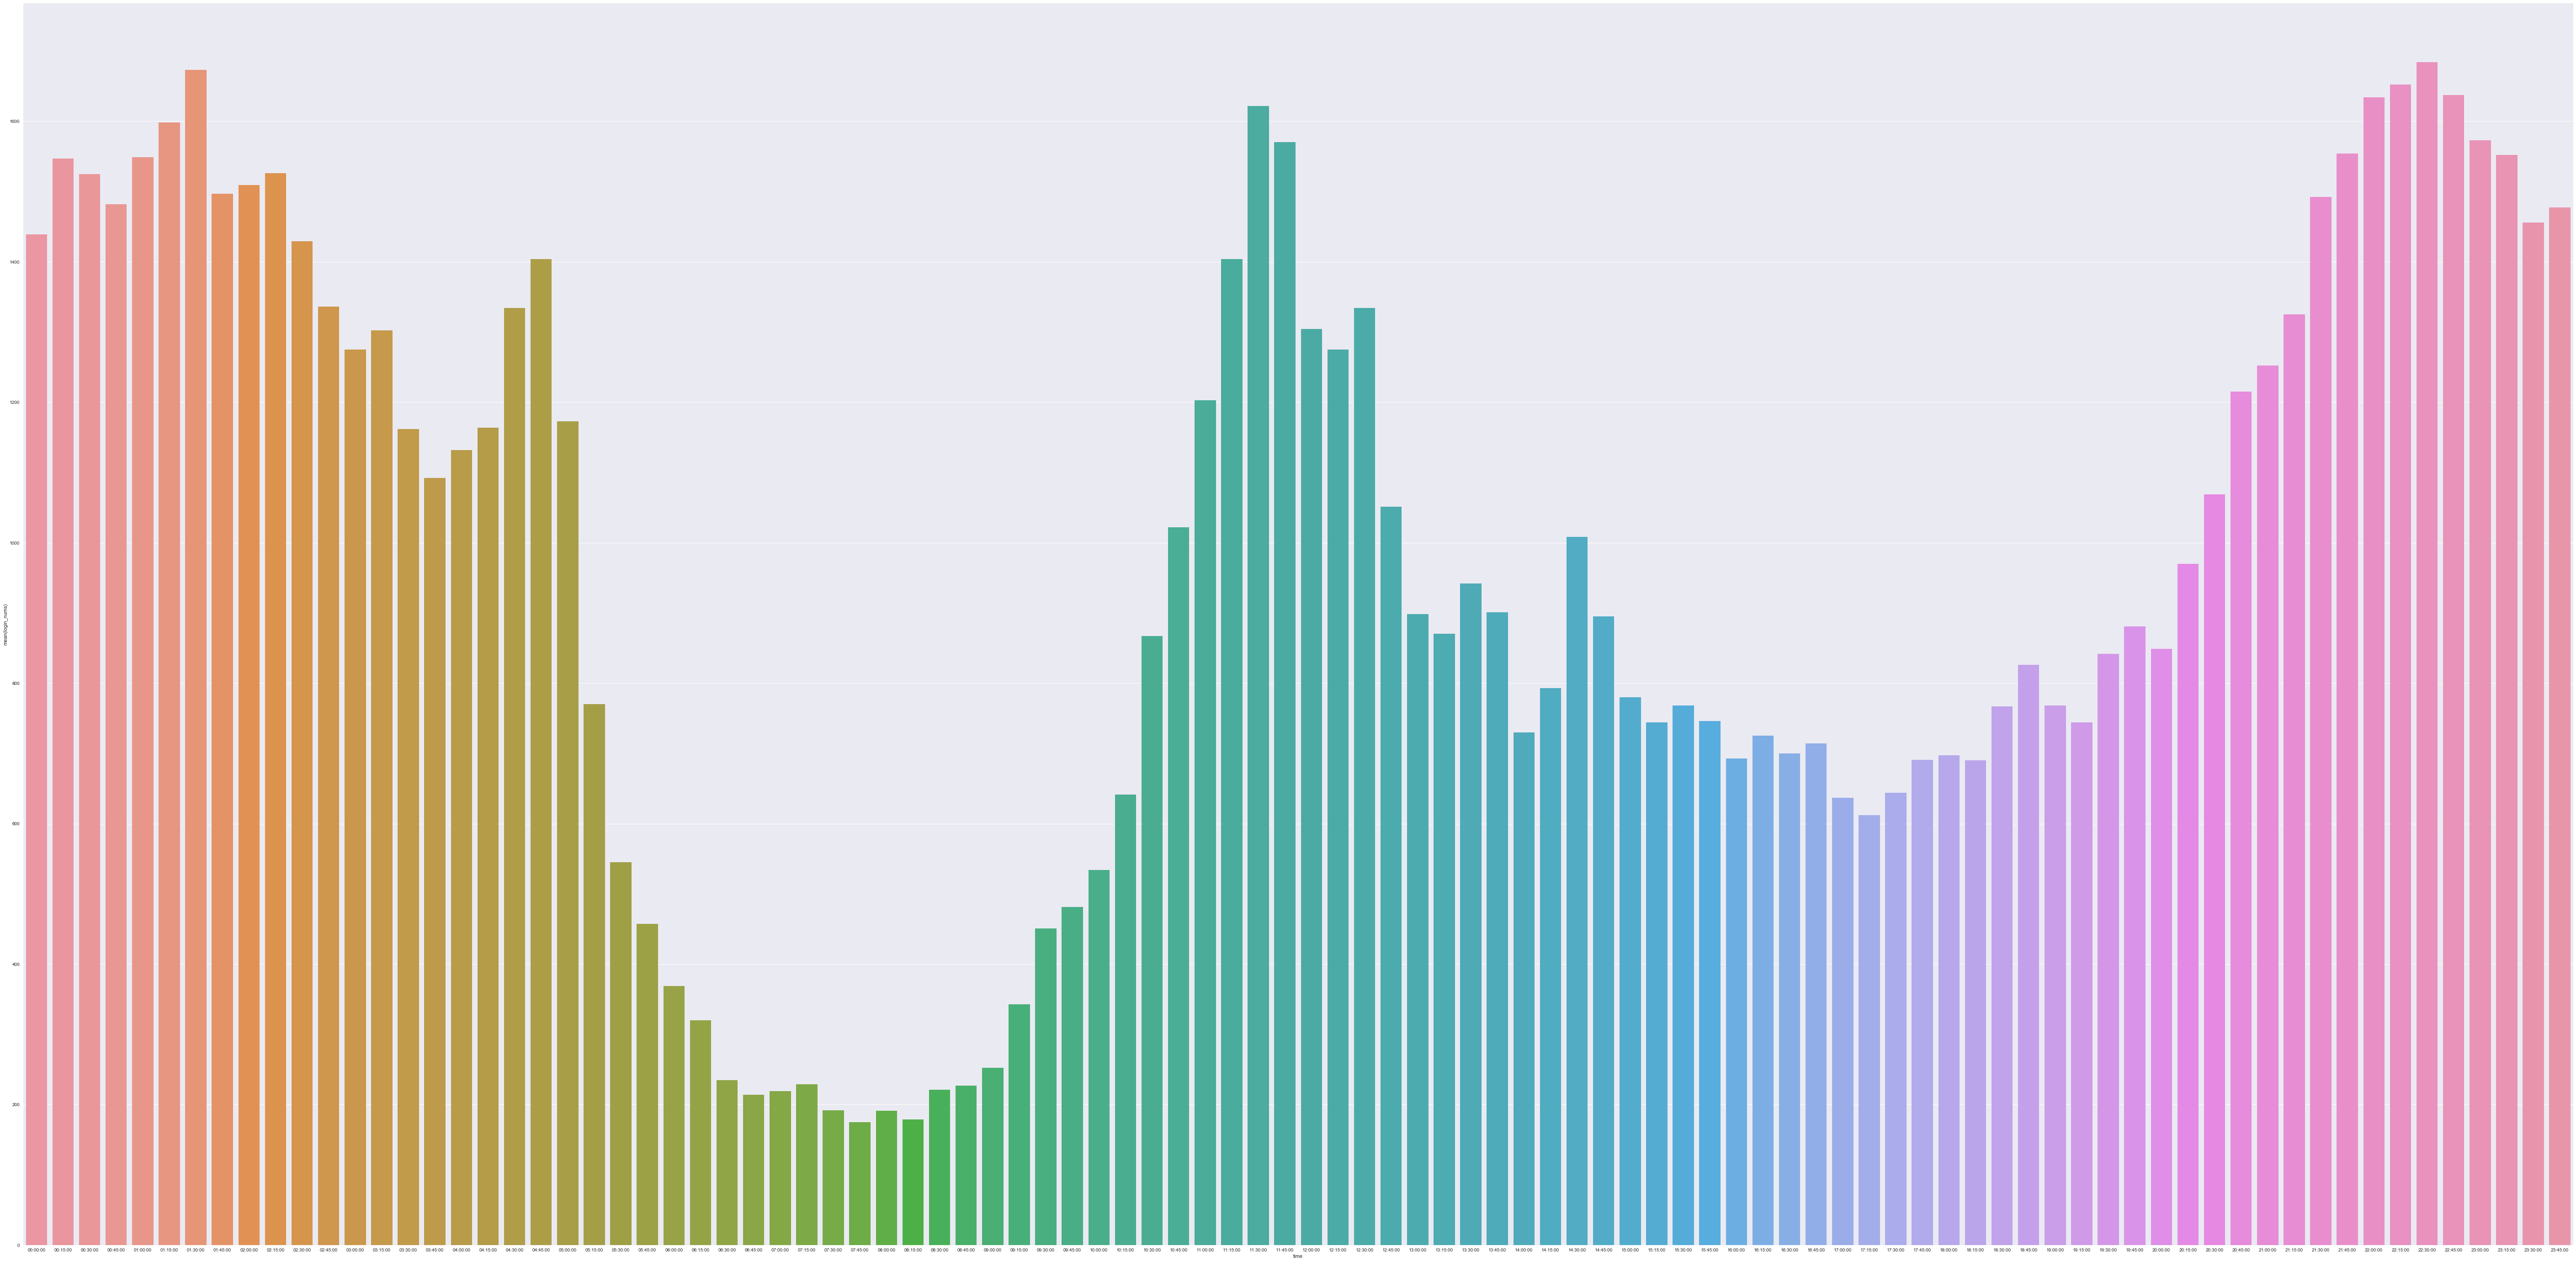

In [4]:
# Visualize the over all daily login pattern
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(100,50))
sns.barplot(df1.index, df1)
plt.show()


As it is shown in the above graph, the login numbers reaches peak values at around 10:30 (+- 1 hour), 11:30 (+- 1 hour), and 22:30 (+- 1 hour), which means the demand is highest at these time point; and the demand is the lowest around 8:00 (+- 1 hour), and 17:00 (+- 1 hour). 

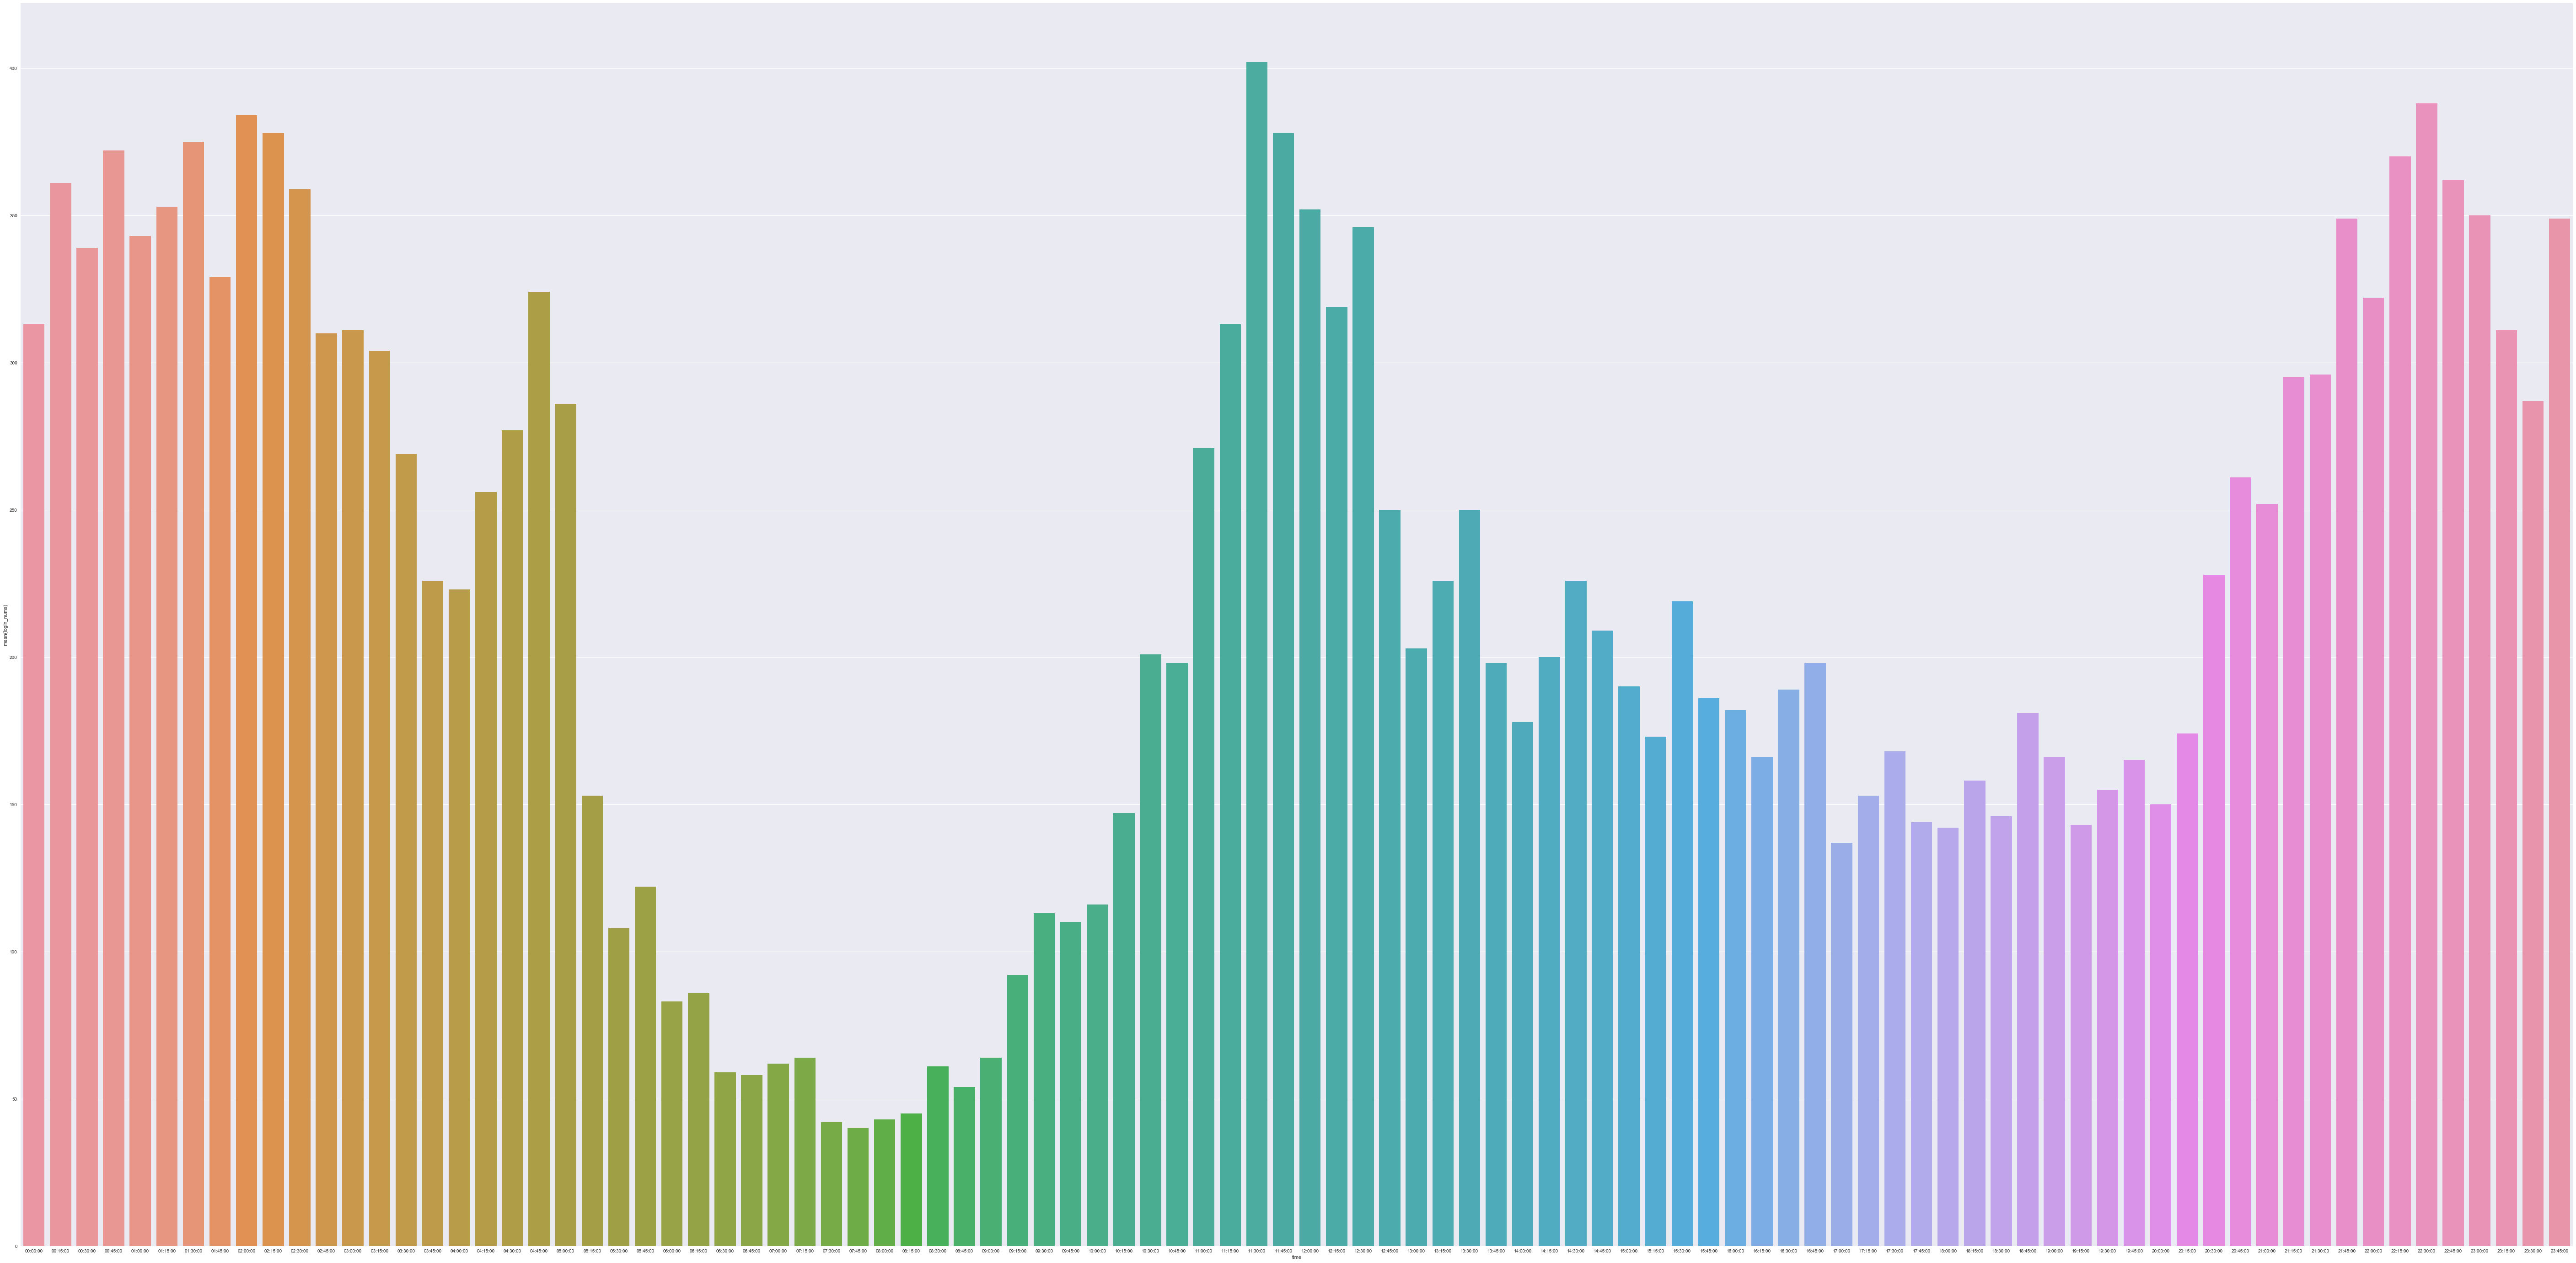

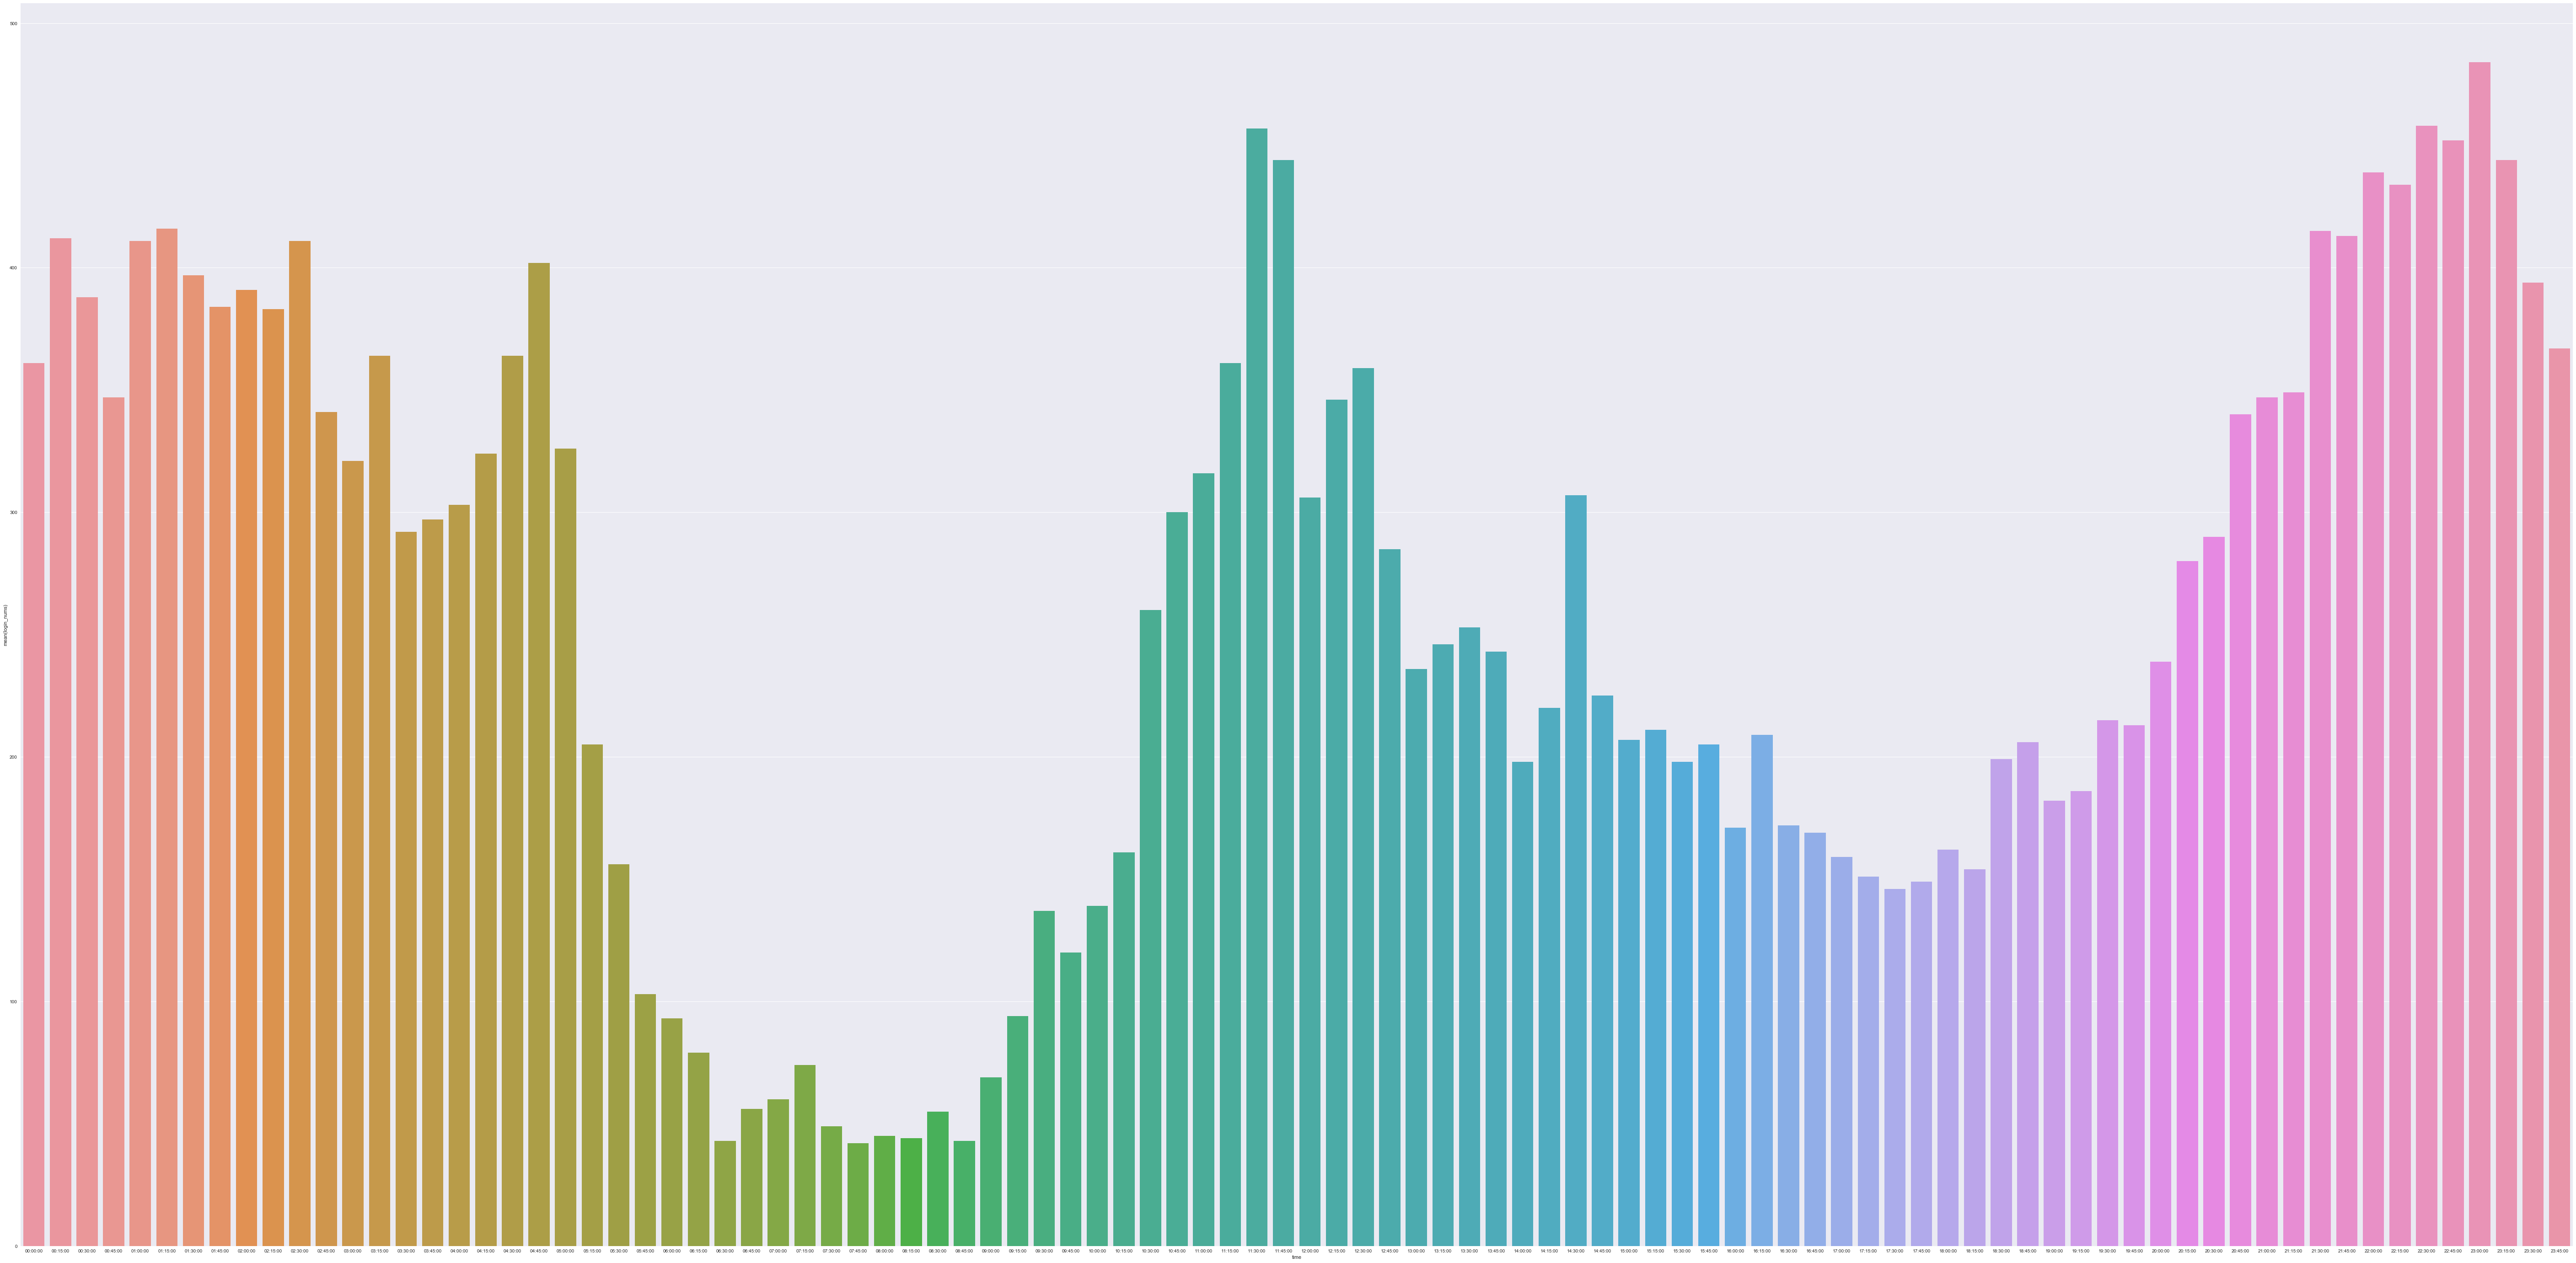

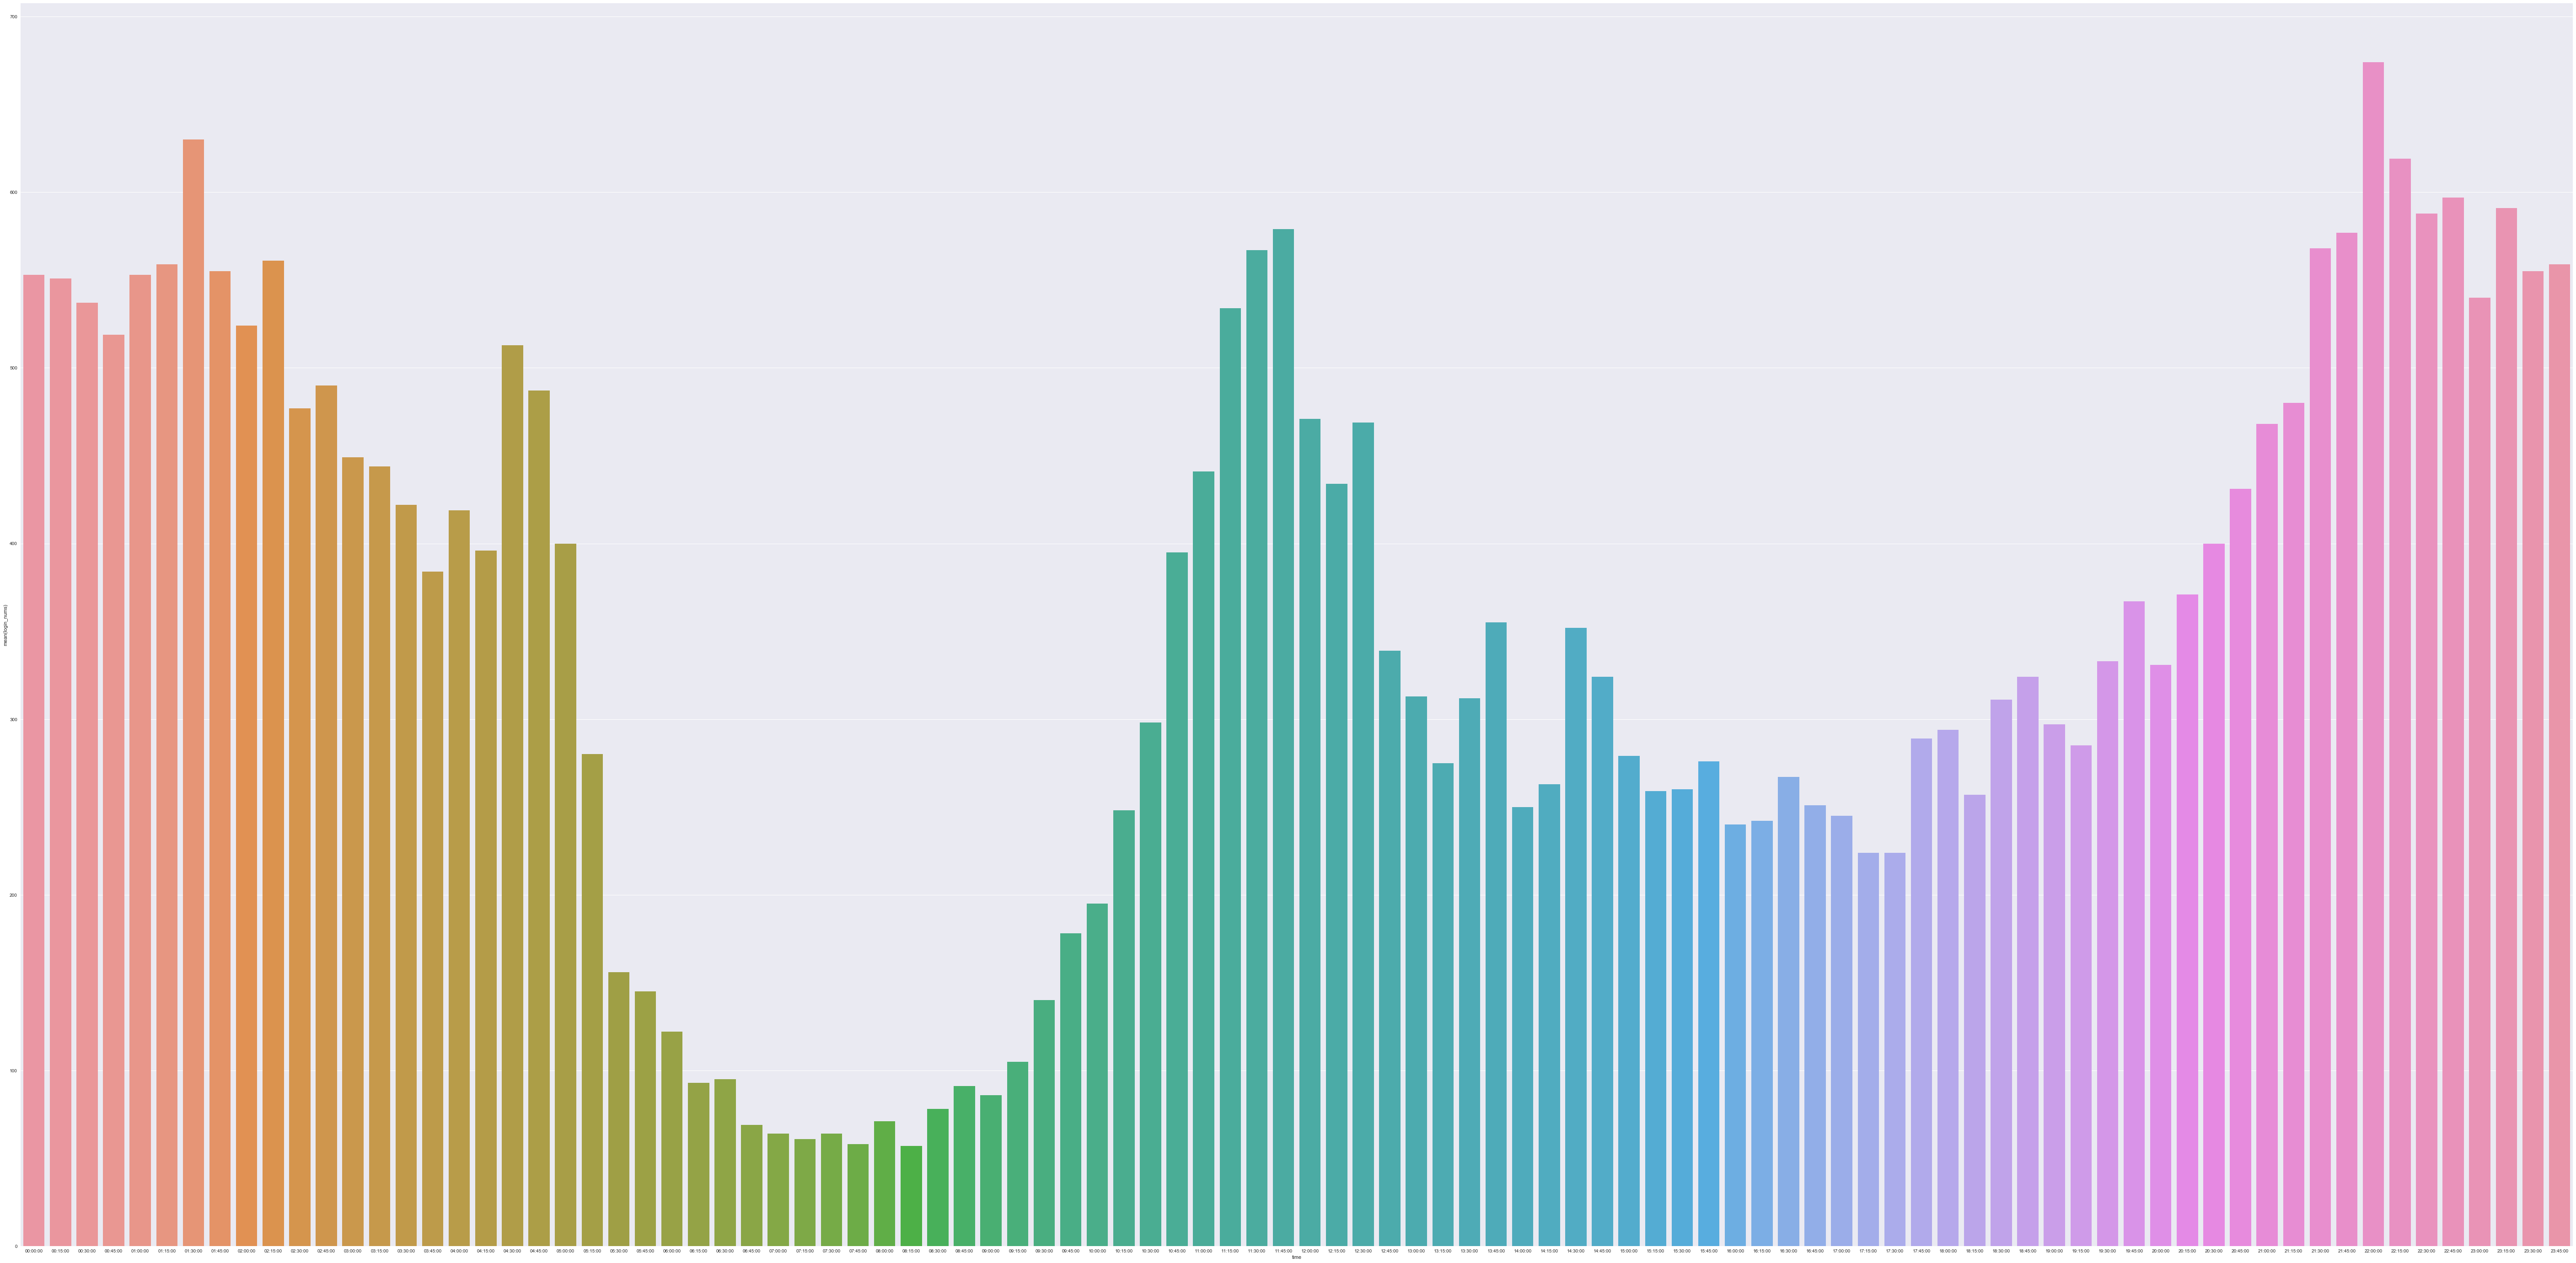

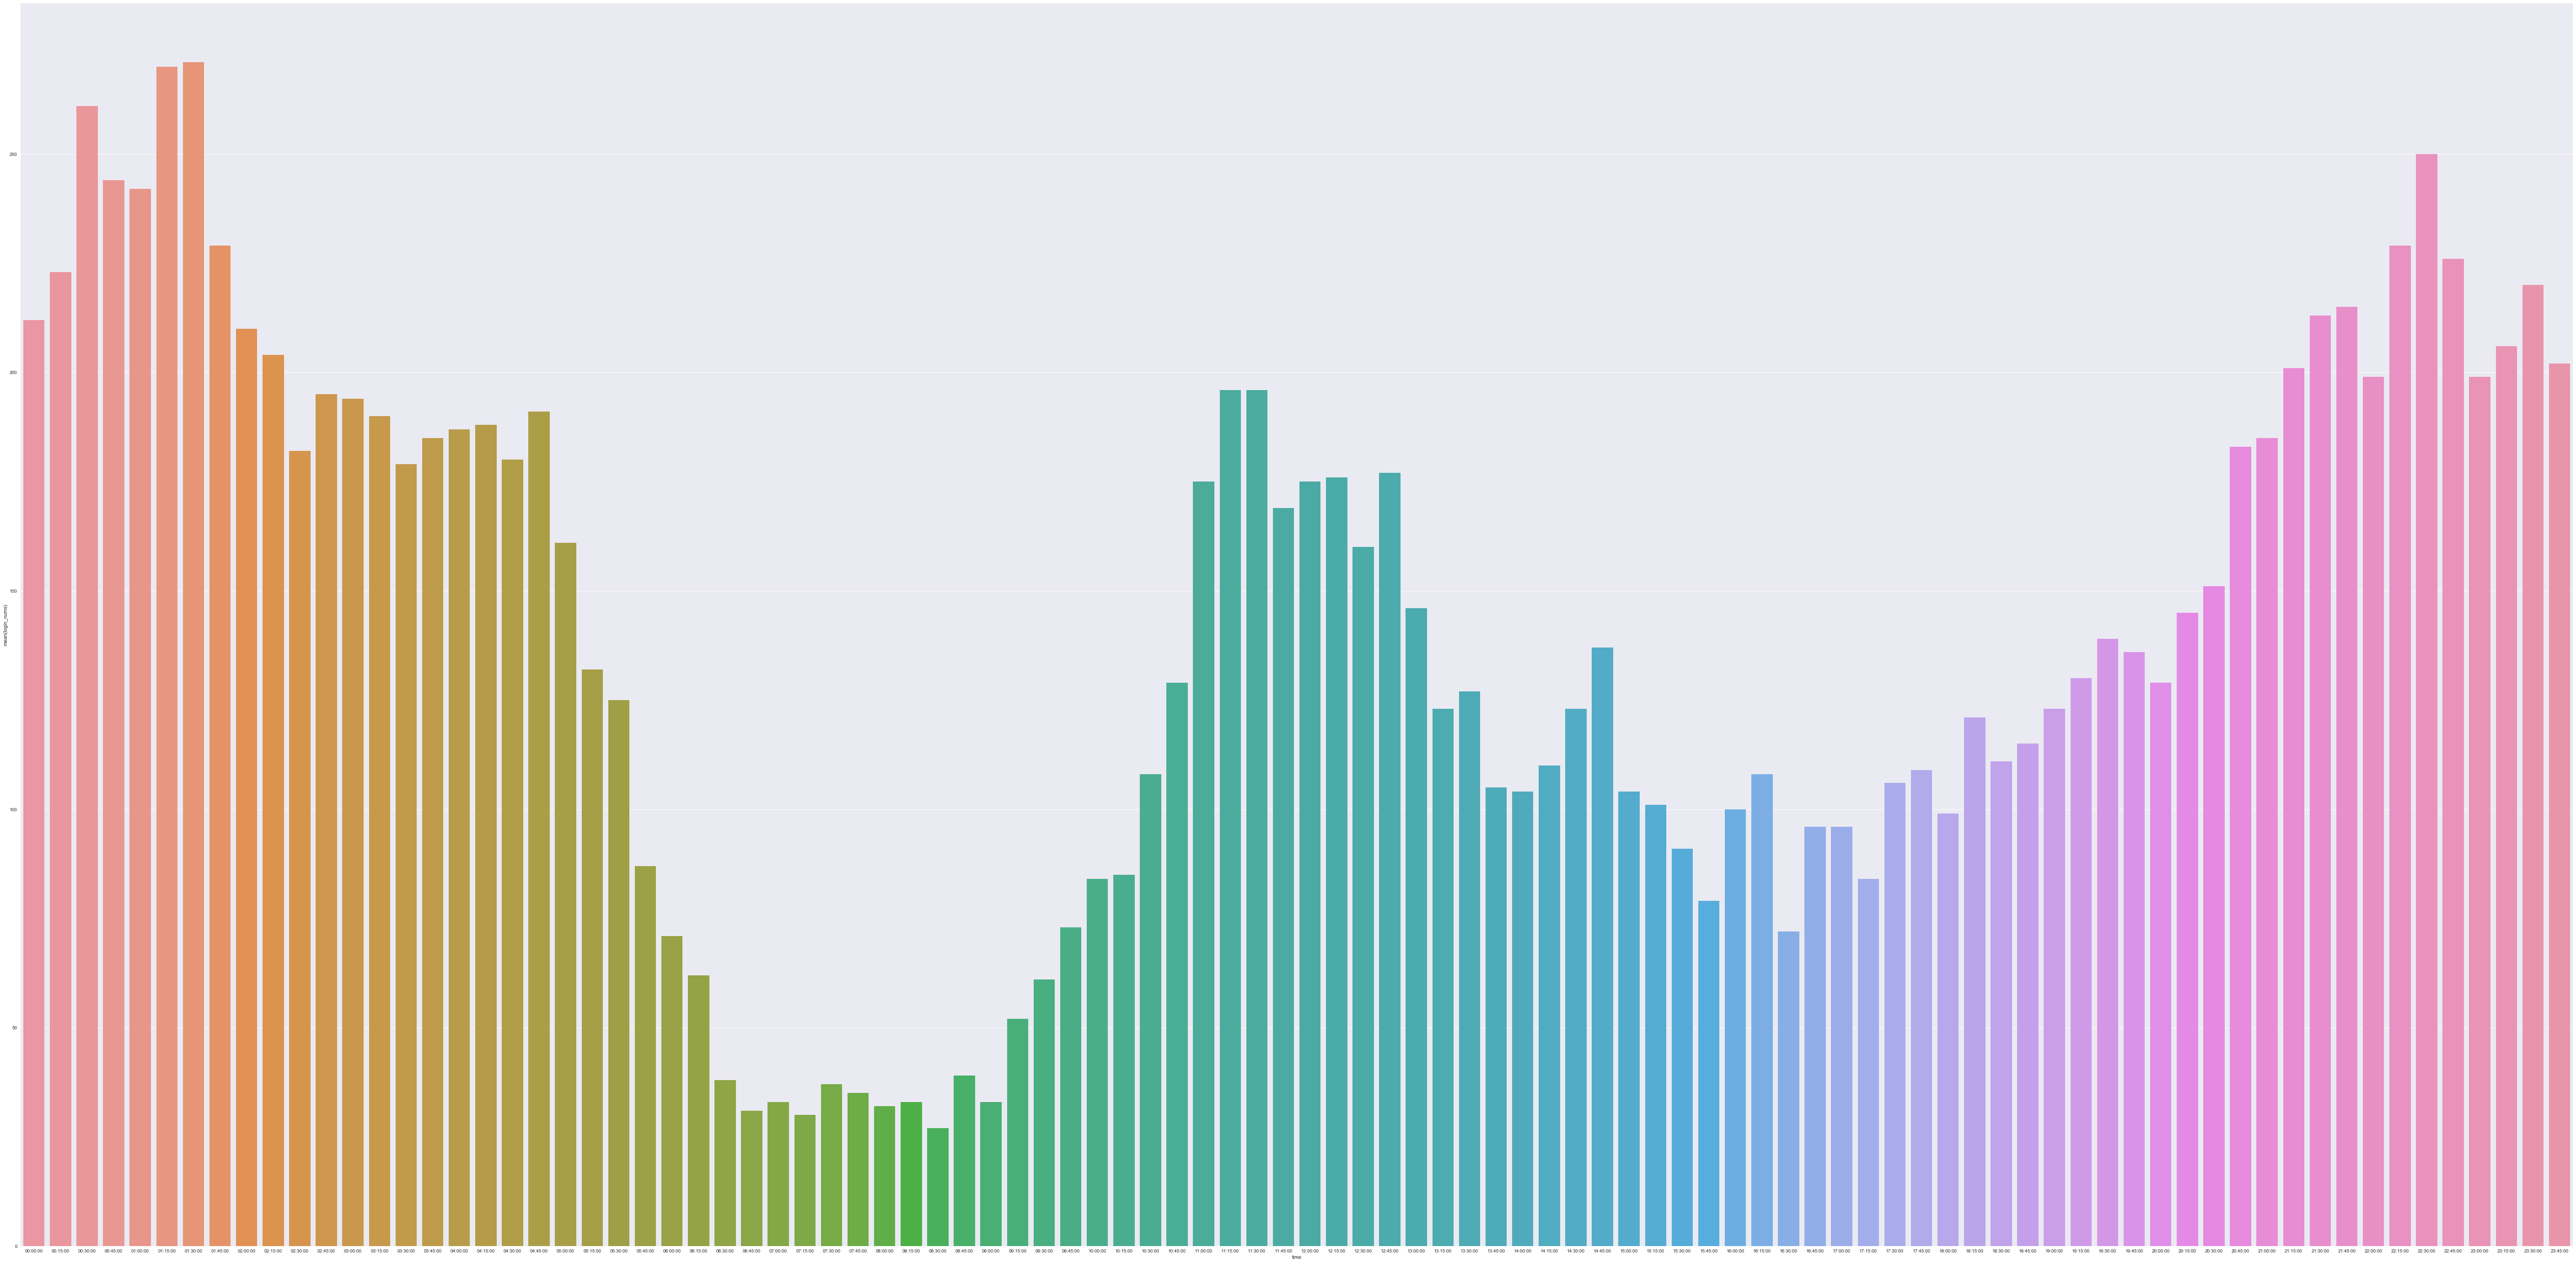

In [10]:
# Visuallize the aggregate daily pattern for every month (from Jan to Apr)
for month in range(1,5):
    df1 = df.loc['1970-{}'.format(month)].groupby('time')['login_nums'].sum()
    plt.figure(figsize=(100,50))
    sns.barplot(df1.index, df1)
    plt.show()


The aggregate daily login pattern per month is consistent with the overall daily pattern.
Also, at each 15 minute, the monthly aggregate login numbers remains at the same level, which indicate that the demand remains a stable level over the four months' time span. 

# Problem 2

> Question 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Answer: The objective of the experiment is to find out if reimbursing the toll fees would ecourage driver partners to serve both cities. 
If it would, the driver partners would commute between the two cities more than before, hence more toll fees would be paid and be reimbursed;
If it would not, then the amount of paid toll fees would remain the same, and not much reimbursment would be needed. 
It seems that the reimbursed toll fees is the key measure of success of this experiment.

> Qusetion 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
>* a. how you will implement the experiment
>* b. what statistical test(s) you will conduct to verify the significance of the observation
>* c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Answer: 
1. An AB test seems to a proper way for this experiment: first, randomly selet two groups of driver partners, each group contains the same number of drivers; second, provide one group (experimental group) with the reimbursment policy, and the other group (control group) without the reimbursment. Third, keep track of the reimbursed toll fees (for the experimental group)/the paid toll fees (for the control group) for certain amount of time; Fourth, compared the toll fees of the two groups.

2. To see if the difference between the two groups has statistical significance, a T-test would be performed.

3. If the null hypothesis (there is no difference between the two groups) is rejected at a significat level (90+%), and there is  a considerable difference between the two groups, it means that reimbursing the toll fees does encourage driver partners to serve both cities, and the policy shoud be promoted. And vice versa. 

# Problem 3

In [8]:
import pandas as pd
import json
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

df = pd.DataFrame(data)
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None
           avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          49799.000000          41878.000000  50000.000000   
mean       5.796827              4.778158              4.601559      1.074

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


> Question 1.Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

There are 8000+ Nan values in the 'avg_rating_of_driver' column, too much to be simply discard, use the column mean to fill in.
And clearly the 'phone' column would neither help the predictive model, nor can the company do anything to improve, hence drop the column.

In [15]:
# Drop 'phone' column
df = df.drop('phone',1)
# Fill Nan values with column mean
df = df.fillna(df.mean())
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 3.9+ MB


In [19]:
retained_rate = df.loc[df['trips_in_first_30_days']>0].shape[0]/50000
print('The percentage of retained drivers is {}%'.format(retained_rate*100))

The percentage of retained drivers is 69.22%


> Question 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

In [38]:
# Convert the date string into timestamp
df['signup_date'] = pd.to_datetime(df['signup_date'], format='%Y/%m/%d')
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format='%Y/%m/%d')

# Consider user active in their 6th month if last trip happens 5 months after their sign up date
df['Y'] = df['last_trip_date']>=df['signup_date'] + pd.Timedelta('150 days')
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Y
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,2014-01-25,15.4,4,True,46.2,False
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,2014-01-27,11.8,14,False,82.4,False


In [47]:
df1 = df.copy()
# Drop the two datetime columns, for their 100% correlated to the Y
df1 = df1.drop('last_trip_date', 1)
df1 = df1.drop('signup_date', 1)
# Convert the 'city' feature into 0-1's
df1.city = pd.get_dummies(df1.city)
y = df1.Y
X = df1.drop('Y',1)


In [48]:
# Unsing the Naive Bayes algorithm to build the predictive model
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Split the data set into training set and test set, the size of the test set is 1/5 of the original data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [49]:
# Set the parameters by cross-validation
tuned_parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10]}
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MultinomialNB(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'alpha': 0.0001}

Grid scores on development set:

0.588 (+/-0.014) for {'alpha': 0.0001}
0.588 (+/-0.014) for {'alpha': 0.001}
0.588 (+/-0.014) for {'alpha': 0.01}
0.588 (+/-0.014) for {'alpha': 0.1}
0.588 (+/-0.014) for {'alpha': 1}
0.588 (+/-0.014) for {'alpha': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

      False       0.78      0.80      0.79      7399
       True       0.39      0.37      0.38      2601

avg / total       0.68      0.69      0.68     10000


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'alpha': 0.0001}

Grid scores on development set:

0.587 (+/-0.012) for {'alpha': 0.0001}
0.587 (+/-0.012) for {'alpha': 0.001}
0.587 (+/-0.012) for {'alpha': 0.01}
0.587 (+/-0.012) for {'alpha': 0.1}
0

> Question 3.Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

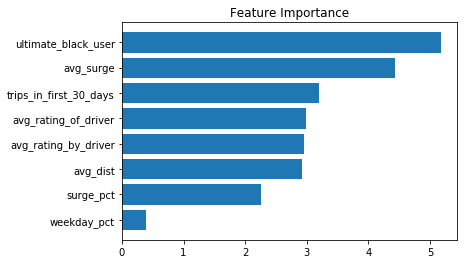

In [52]:
# Examine the featrue importance
import matplotlib.pyplot as plt
import numpy as np

# Using the coef_ attribute as the ranking of the feature importance
# Define a function that will show the most important features
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(8), imp[-9:-1], align='center')
    plt.yticks(range(8), names[-9:-1])
    plt.title('Feature Importance')
    plt.show()
    
features_names = X_train.columns.tolist()
mnb = MultinomialNB(alpha=0.0001)
mnb.fit(X_train, y_train)

mcoef = np.abs(mnb.coef_[0,:])
f_importances(mcoef, features_names)


The above plot suggests that the two most important features are 'ultimate_black_user' and 'avg_surge', which means that if a user took an Ultimate Black in their first 30 days, and if the average surge multiplier over all of this user’s trips is higher, they will have a higher chance to be active in the 6th month.